In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import sklearn

In [3]:
air_data = pd.read_csv('pca_data_selection_norm.csv', delimiter=',')


In [5]:
u, s, v = np.linalg.svd(air_data, 
                         full_matrices=True) 
eigenval, eigenvec = s ** 2, v

In [10]:
## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 

<BarContainer object of 11 artists>

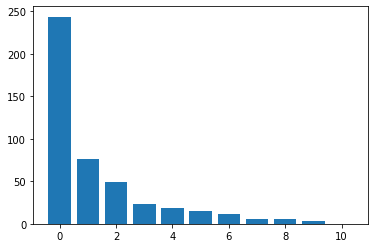

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#(eigenval, eigenvec) = pca(data_zscore[cols_pca])

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)

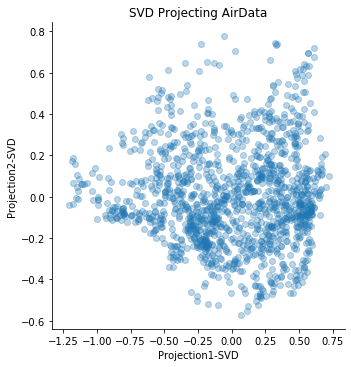

In [28]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(2)]
ds_us = pd.DataFrame(data= np.c_[u1, u2], 
                     columns=names)

# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting AirData');

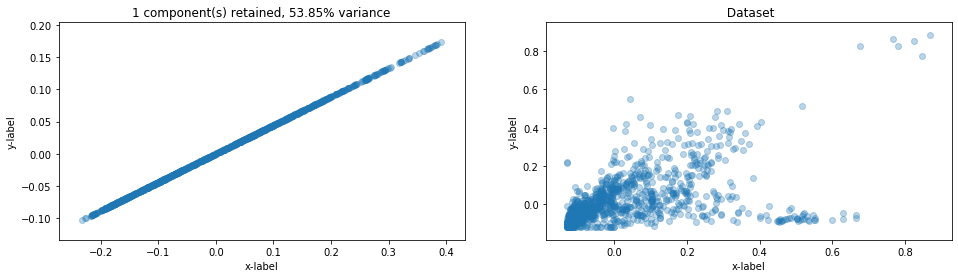

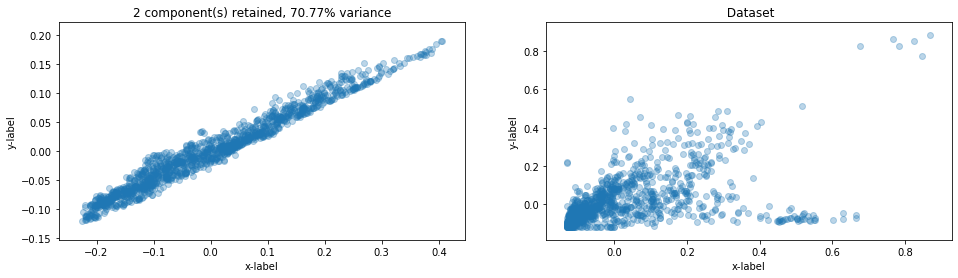

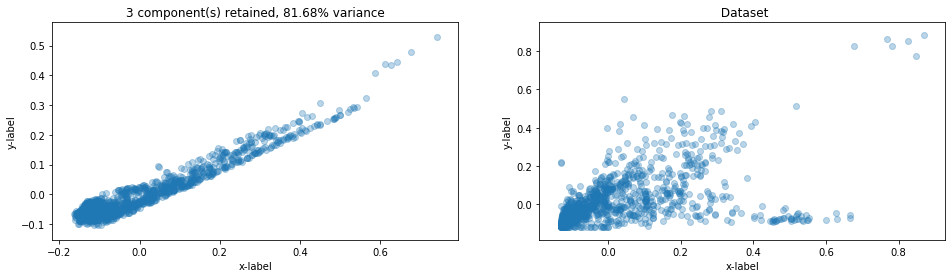

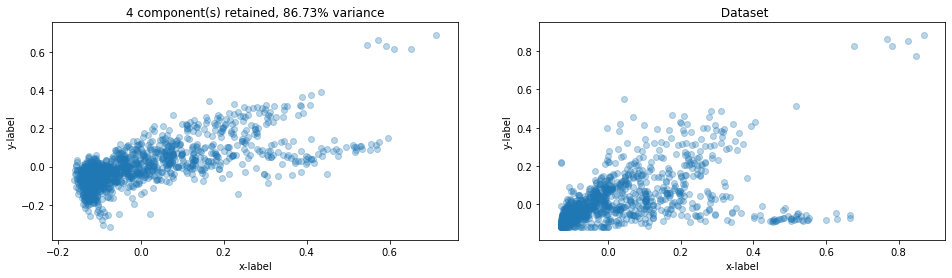

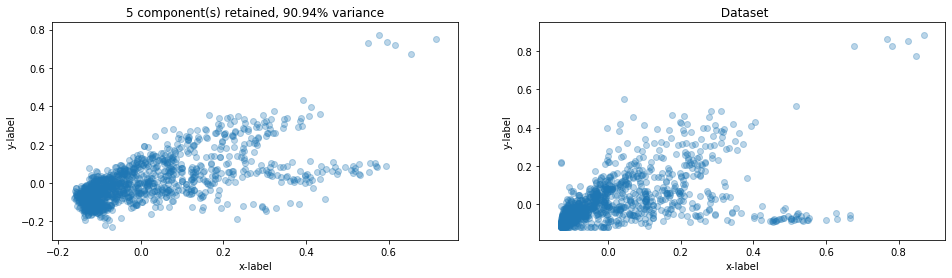

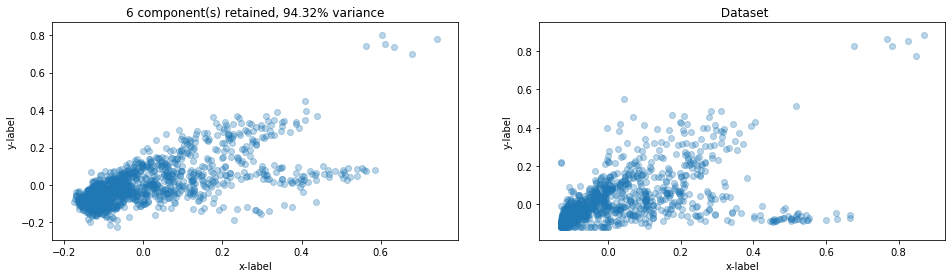

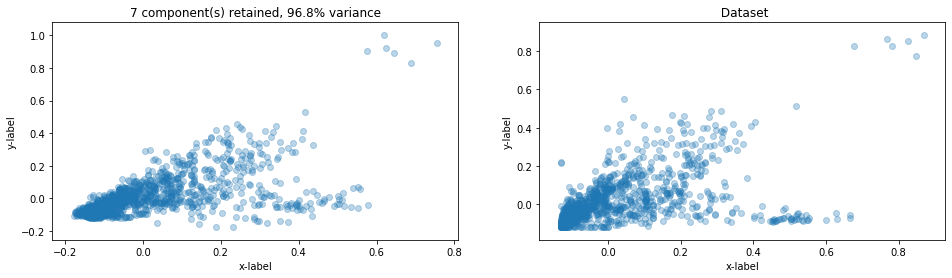

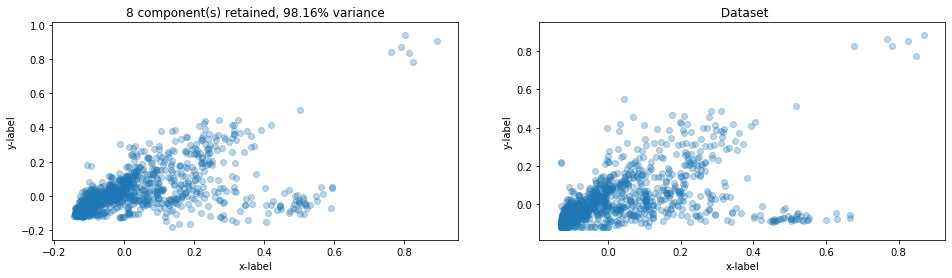

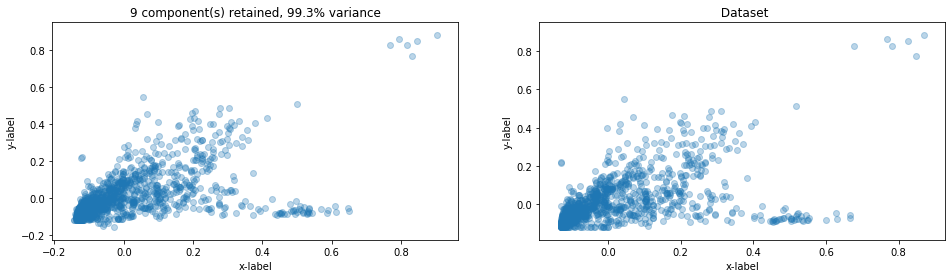

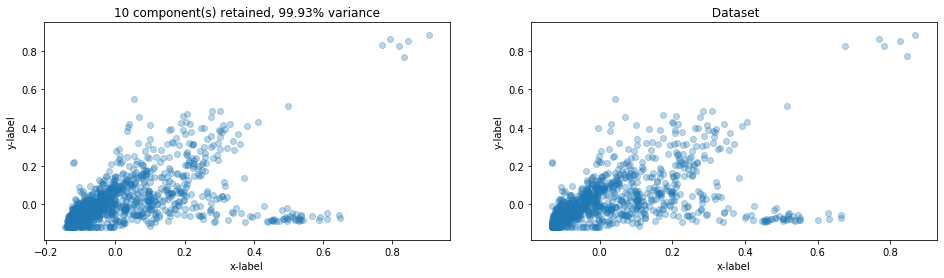

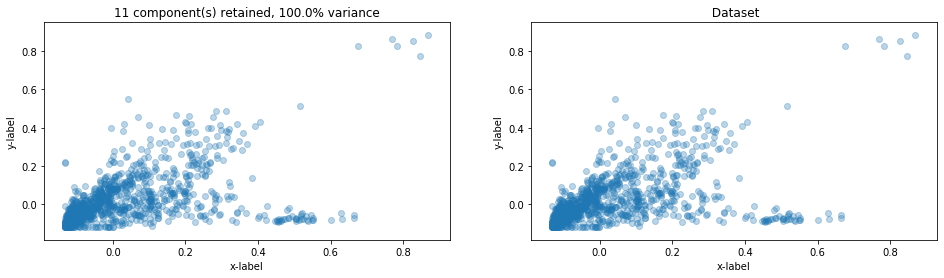

In [29]:
r = air_data.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 10
# PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM

f1=0   #pm2.5
f2=2   #so2

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'x-label', 
           ylabel= 'y-label',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=np.array(air_data)[:,f1],
                y=np.array(air_data)[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='x-label', 
           ylabel= 'y-label',
           title=' Dataset');